In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

## Question 1.

In [63]:
data = pd.read_csv("D:\Data Science Materials Amrita MTech\ML\mnist_train.csv")

In [64]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
l = data["label"]
d = data.drop("label",axis=1)

In [66]:
d.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
l.head(20)

0     5
1     0
2     4
3     1
4     9
5     2
6     1
7     3
8     1
9     4
10    3
11    5
12    3
13    6
14    1
15    7
16    2
17    8
18    6
19    9
Name: label, dtype: int64

In [68]:
d.shape

(60000, 784)

In [69]:
l.shape

(60000,)

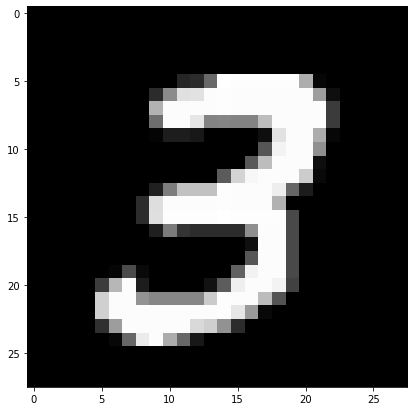

3


In [70]:
# Displaying or plotting a number
plt.figure(figsize=(7,7))
idx = 7
grid_data = d.iloc[idx].to_numpy().reshape(28,28) # from 1 D to 2D
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
print(l[idx])


In [72]:
svd = TruncatedSVD(n_components = 25)   # By default n_components = 2.
x = svd.fit(d).transform(d)
l_m = RandomForestClassifier(n_estimators=50)
x_train, x_test, y_train, y_test = train_test_split(x,l,test_size=0.2, random_state=4)
l_m.fit(x_train,y_train)
pred = l_m.predict(x_test)
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1
count/float(len(pred))          

0.95

# Question 2

In [73]:
l_m = LogisticRegression(multi_class='multinomial')
x_train, x_test, y_train, y_test = train_test_split(d,l,test_size=0.2, random_state=4)
l_m.fit(x_train,y_train)
pred = l_m.predict(x_test)

In [74]:
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1
count/float(len(pred))

0.9180833333333334

# Question 3

In [75]:
svd = TruncatedSVD(n_components = 25)
x = svd.fit(d).transform(d)
l_m = LogisticRegression(multi_class='multinomial')
x_train, x_test, y_train, y_test = train_test_split(x,l,test_size=0.2, random_state=4)
l_m.fit(x_train,y_train)
pred = l_m.predict(x_test)
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1
count/float(len(pred))

0.8793333333333333

# Question 4

In [76]:
def svd_(i):
    svd = TruncatedSVD(n_components = i)
    x = svd.fit(d).transform(d)
    l_m = LogisticRegression(multi_class='multinomial')
    x_train, x_test, y_train, y_test = train_test_split(x,l,test_size=0.2, random_state=4)
    l_m.fit(x_train,y_train)
    pred = l_m.predict(x_test)
    s = y_test.values
    count = 0
    for i in range(len(pred)):
        if pred[i]==s[i]:
            count = count + 1
    return count/float(len(pred))

In [38]:
a=[1,5,10,15,20,25,30,35,40,45,50,55]

In [39]:
accuracy_array = [svd_(i) for i in a]

In [40]:
accuracy_array

[0.19908333333333333,
 0.6396666666666667,
 0.7884166666666667,
 0.83125,
 0.8675833333333334,
 0.8784166666666666,
 0.8859166666666667,
 0.8924166666666666,
 0.8975833333333333,
 0.899,
 0.9013333333333333,
 0.9065833333333333]

In [47]:
import matplotlib.pyplot as plt


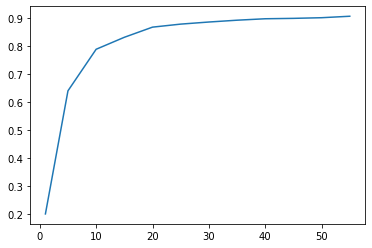

In [48]:
plt.plot(a,accuracy_array)

# Question 5 

In [60]:
l_m = LogisticRegression(multi_class='multinomial')
x_train, x_test, y_train, y_test = train_test_split(d,l,test_size=0.2, random_state=4)
l_m.fit(x_train,y_train)
pred = l_m.predict(x_test)

In [61]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.97      0.96      1197
     class 1       0.95      0.97      0.96      1342
     class 2       0.91      0.89      0.90      1245
     class 3       0.89      0.90      0.89      1225
     class 4       0.92      0.93      0.93      1126
     class 5       0.90      0.87      0.89      1088
     class 6       0.94      0.96      0.95      1172
     class 7       0.92      0.92      0.92      1280
     class 8       0.87      0.88      0.87      1168
     class 9       0.89      0.89      0.89      1157

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



In [62]:
svd = TruncatedSVD(n_components = 20)
x = svd.fit(d).transform(d)
l_m = LogisticRegression(multi_class='multinomial')
x_train, x_test, y_train, y_test = train_test_split(x,l,test_size=0.2, random_state=4)
l_m.fit(x_train,y_train)
pred1 = l_m.predict(x_test)



In [63]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(y_test, pred1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.96      0.95      1197
     class 1       0.93      0.96      0.95      1342
     class 2       0.87      0.83      0.85      1245
     class 3       0.82      0.84      0.83      1225
     class 4       0.87      0.88      0.88      1126
     class 5       0.81      0.76      0.79      1088
     class 6       0.91      0.92      0.92      1172
     class 7       0.90      0.89      0.89      1280
     class 8       0.78      0.79      0.79      1168
     class 9       0.83      0.82      0.82      1157

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000

